## Agglomerative clustering with categorical data


In [1]:
# Zoo dataset : https://www.kaggle.com/datasets/uciml/zoo-animal-classification/code?datasetId=586&searchQuery=hier&select=zoo.csv

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from ch_9_funcs import plot_cluster_dendrogram, cophenetic_corr

sns.set_theme()

## Animal zoo dataset

The Zoo Dataset is a comprehensive collection of data about various animals found in zoos worldwide. The dataset is composed of several attributes related to these animals, such as:

- `animal_name`: The name of the animal.

- `hair`: Indicates if the animal has hair (1 for yes, 0 for no).
- `feathers`: Indicates if the animal has feathers (1 for yes, 0 for no).
- `eggs`: Indicates if the animal lays eggs (1 for yes, 0 for no).
- `milk`: Indicates if the animal produces milk (1 for yes, 0 for no).
- `airborne`: Indicates if the animal can fly (1 for yes, 0 for no).
- `aquatic`: Indicates if the animal lives in water (1 for yes, 0 for no).
- `predator`: Indicates if the animal is a predator (1 for yes, 0 for no).
- `toothed`: Indicates if the animal has teeth (1 for yes, 0 for no).
- `backbone`: Indicates if the animal has a backbone (1 for yes, 0 for no).
- `breathes`: Indicates if the animal breathes air (1 for yes, 0 for no).
- `venomous`: Indicates if the animal is venomous (1 for yes, 0 for no).
- `fins`: Indicates if the animal has fins (1 for yes, 0 for no).
- `legs`: Number of legs the animal has (integer value).
- `tail`: Indicates if the animal has a tail (1 for yes, 0 for no).
- `domestic`: Indicates if the animal is domesticated (1 for yes, 0 for no).
- `catsize`: Indicates if the animal is cat-sized or larger (1 for yes, 0 for no).
- `class_type`: Numerical code indicating the animal's taxonomic class.


Citation : Forsyth,Richard. (1990). Zoo. UCI Machine Learning Repository. https://doi.org/10.24432/C5R59V.

In [16]:
# Load the data
zoo_path = 'data/zoo/zoo.csv'
zoo_df = pd.read_csv(zoo_path)

# Load class mapping
class_mappings = 'data/zoo/class.csv'
class_mapper = pd.read_csv(class_mappings)

In [3]:
zoo_df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
class_mapper

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


In [5]:
zoo_df.shape

(101, 18)

In [6]:
zoo_df.isna().sum(axis=0)

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [7]:
# Check number of unique animals 
zoo_df['animal_name'].nunique()

100

In [8]:
# Drop duplicates since there should be one species per row
zoo_df = zoo_df.drop_duplicates('animal_name')
zoo_df.shape

(100, 18)

In [17]:
# Map class id to class name
class_map_dict = class_mapper.set_index('Class_Number')['Class_Type'].to_dict()
zoo_df['class_type'] = zoo_df['class_type'].map(class_map_dict)

# Extract class as separate object and drop class from zoo_df
animal_class = zoo_df['class_type'] 
zoo_df = zoo_df.drop(columns=['class_type'])

In [18]:
animal_class

0            Mammal
1            Mammal
2              Fish
3            Mammal
4            Mammal
           ...     
96           Mammal
97              Bug
98           Mammal
99     Invertebrate
100            Bird
Name: class_type, Length: 101, dtype: object

In [19]:
# Set animal name as index
zoo_df = zoo_df.set_index('animal_name', drop=True)

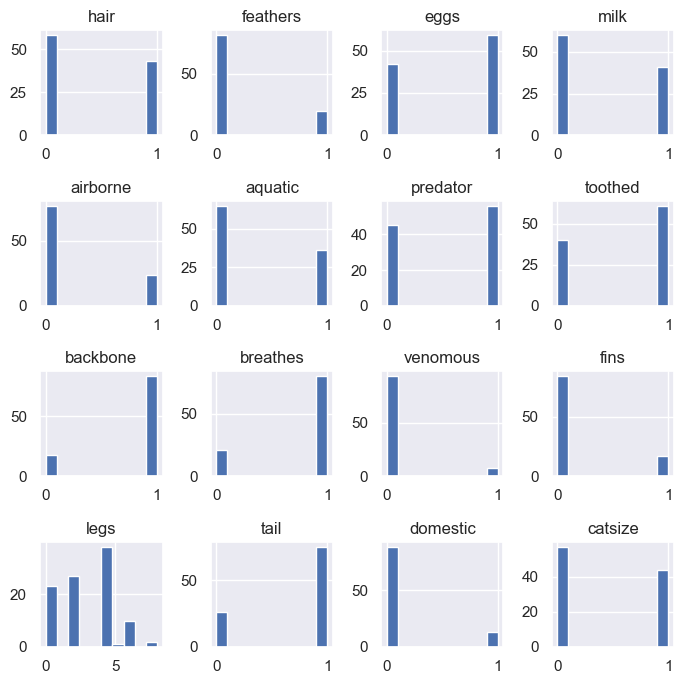

In [20]:
_ = zoo_df.hist(figsize=(7,7))
plt.tight_layout()

### Agglomerative clustering with hamming distance

In [21]:
linkage_matrix = linkage(
    zoo_df.to_numpy(), 
    method='average', 
    metric='hamming'
)

In [22]:
cophenetic_corr(
    linkage_matrix=linkage_matrix,
    data_mtx = zoo_df.to_numpy(),
    distance_measure='hamming'
)

Cophenetic correlation : 0.8571351116930191


In [ ]:
linkage_matrix[:,2] += 0.001 # Add small value to avoid division by zero, because distance_measure='hamming' can sometimes return 0

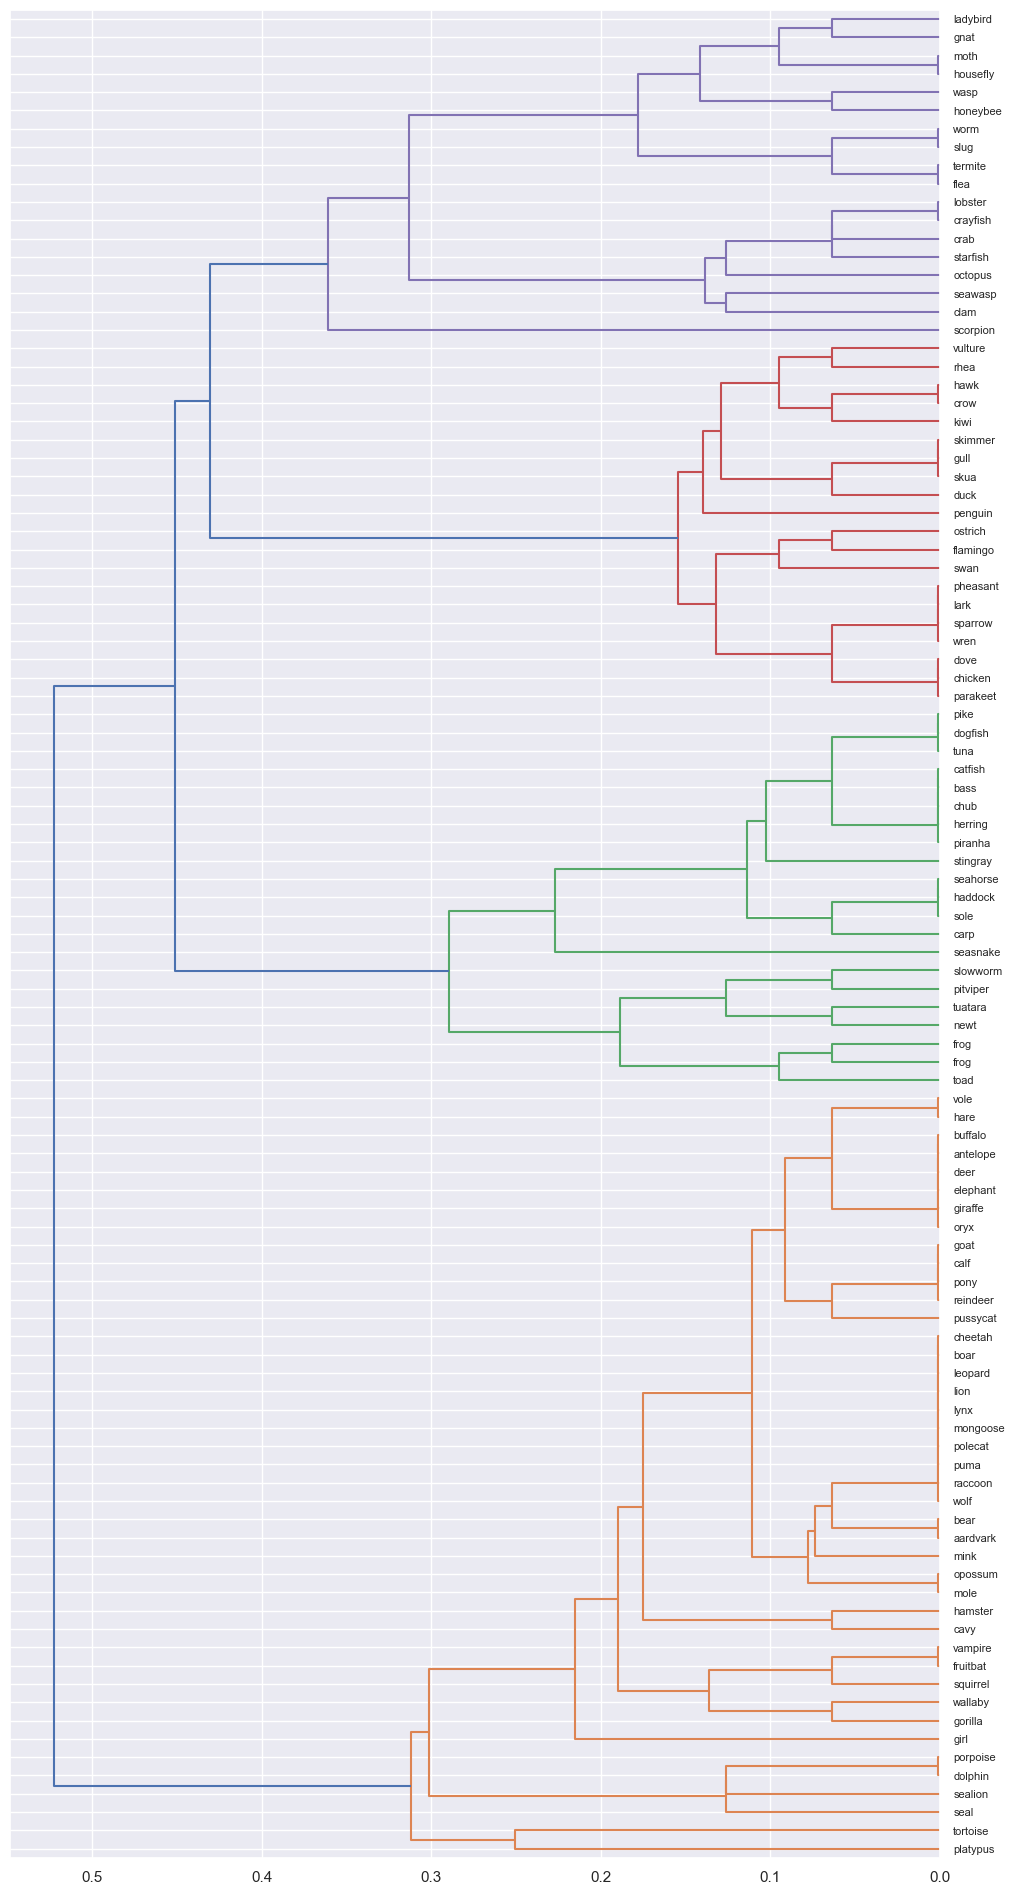

In [24]:
plt.rcParams['figure.figsize'] = [12, 24]
_ = dendrogram(
    linkage_matrix, 
    labels=zoo_df.index,
    orientation='left',
    leaf_font_size=8
)

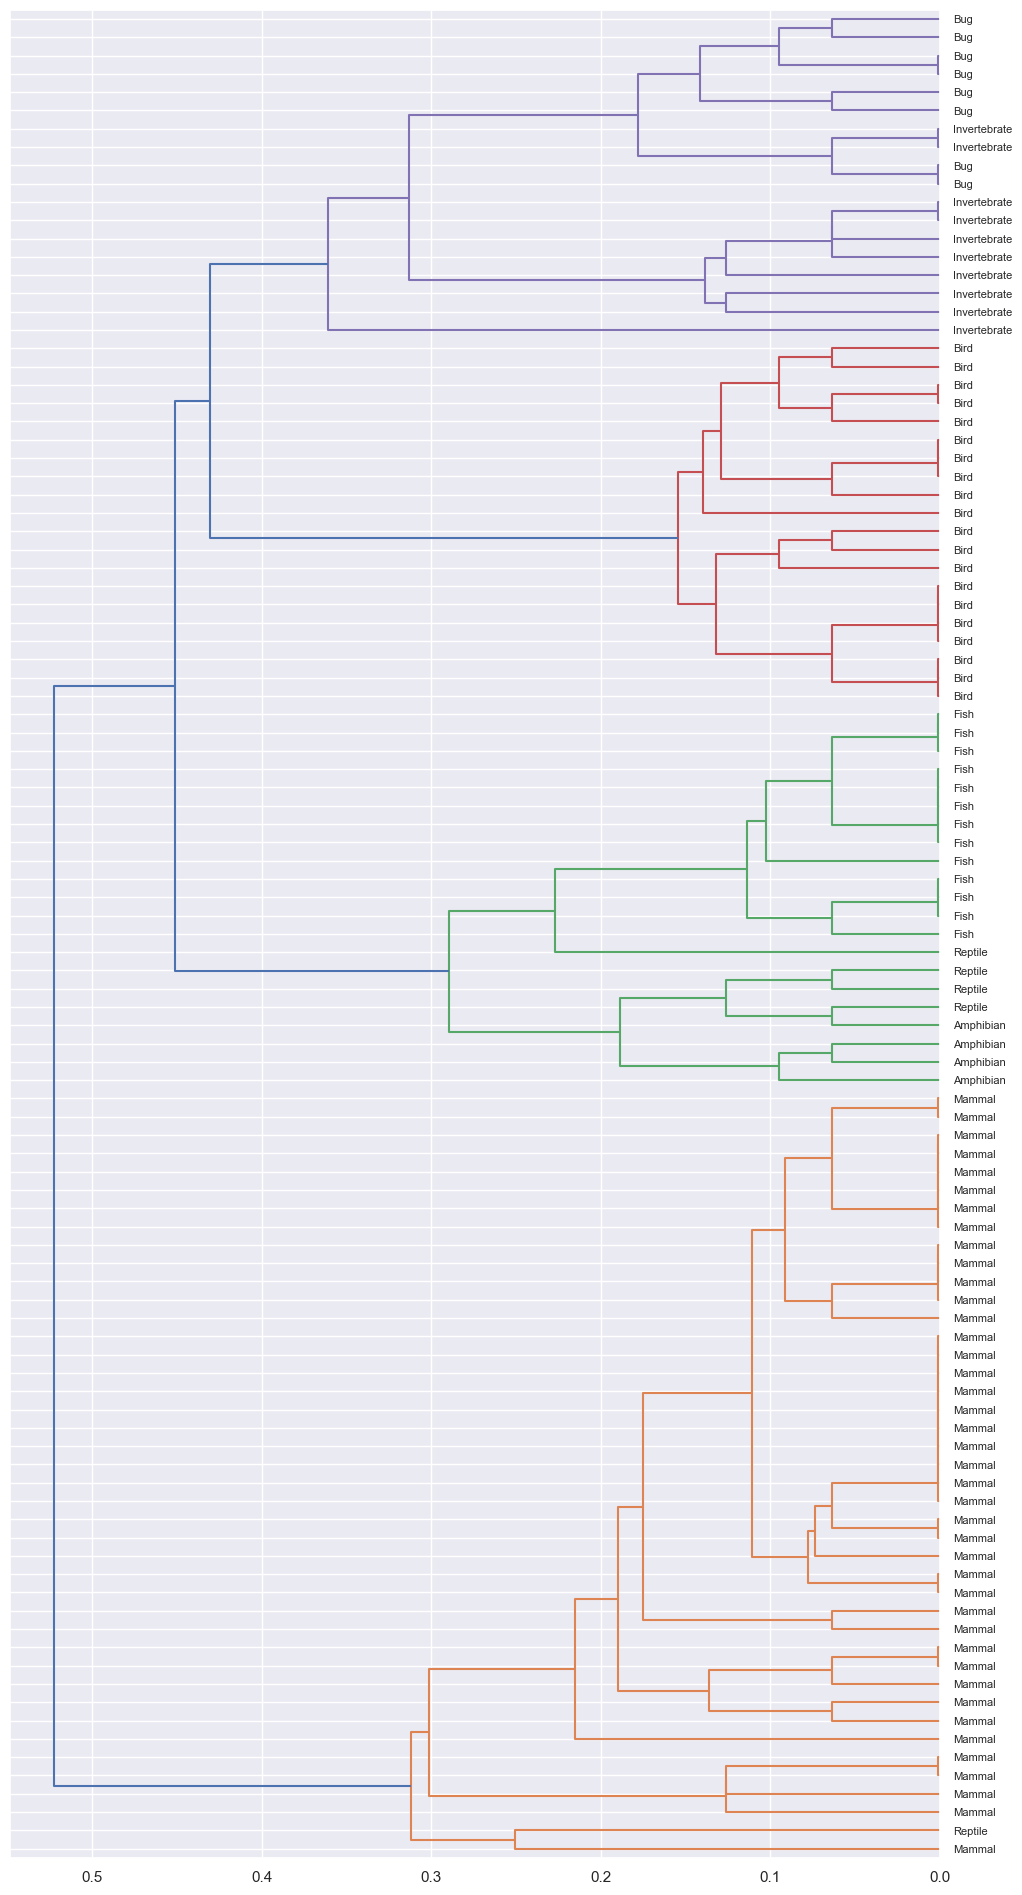

In [25]:
plt.rcParams['figure.figsize'] = [12, 24]
_ = dendrogram(
    linkage_matrix, 
    labels=animal_class.to_numpy(),
    orientation='left',
    leaf_font_size=8
)

In [26]:
# Perform clustering 
clusters = fcluster(Z=linkage_matrix, t=0.28, criterion='distance')
clusters

array([3, 3, 5, 3, 3, 3, 3, 5, 5, 3, 3, 6, 5, 7, 7, 7, 6, 3, 5, 2, 6, 6,
       3, 6, 8, 4, 4, 3, 3, 3, 8, 3, 3, 6, 5, 3, 3, 6, 5, 8, 8, 6, 8, 6,
       3, 3, 7, 3, 3, 3, 3, 8, 4, 7, 3, 3, 6, 6, 6, 6, 5, 5, 4, 1, 3, 3,
       2, 3, 3, 3, 3, 6, 9, 5, 2, 2, 5, 7, 6, 6, 4, 8, 5, 6, 3, 7, 5, 6,
       8, 4, 1, 4, 5, 3, 3, 6, 3, 8, 3, 8, 6], dtype=int32)

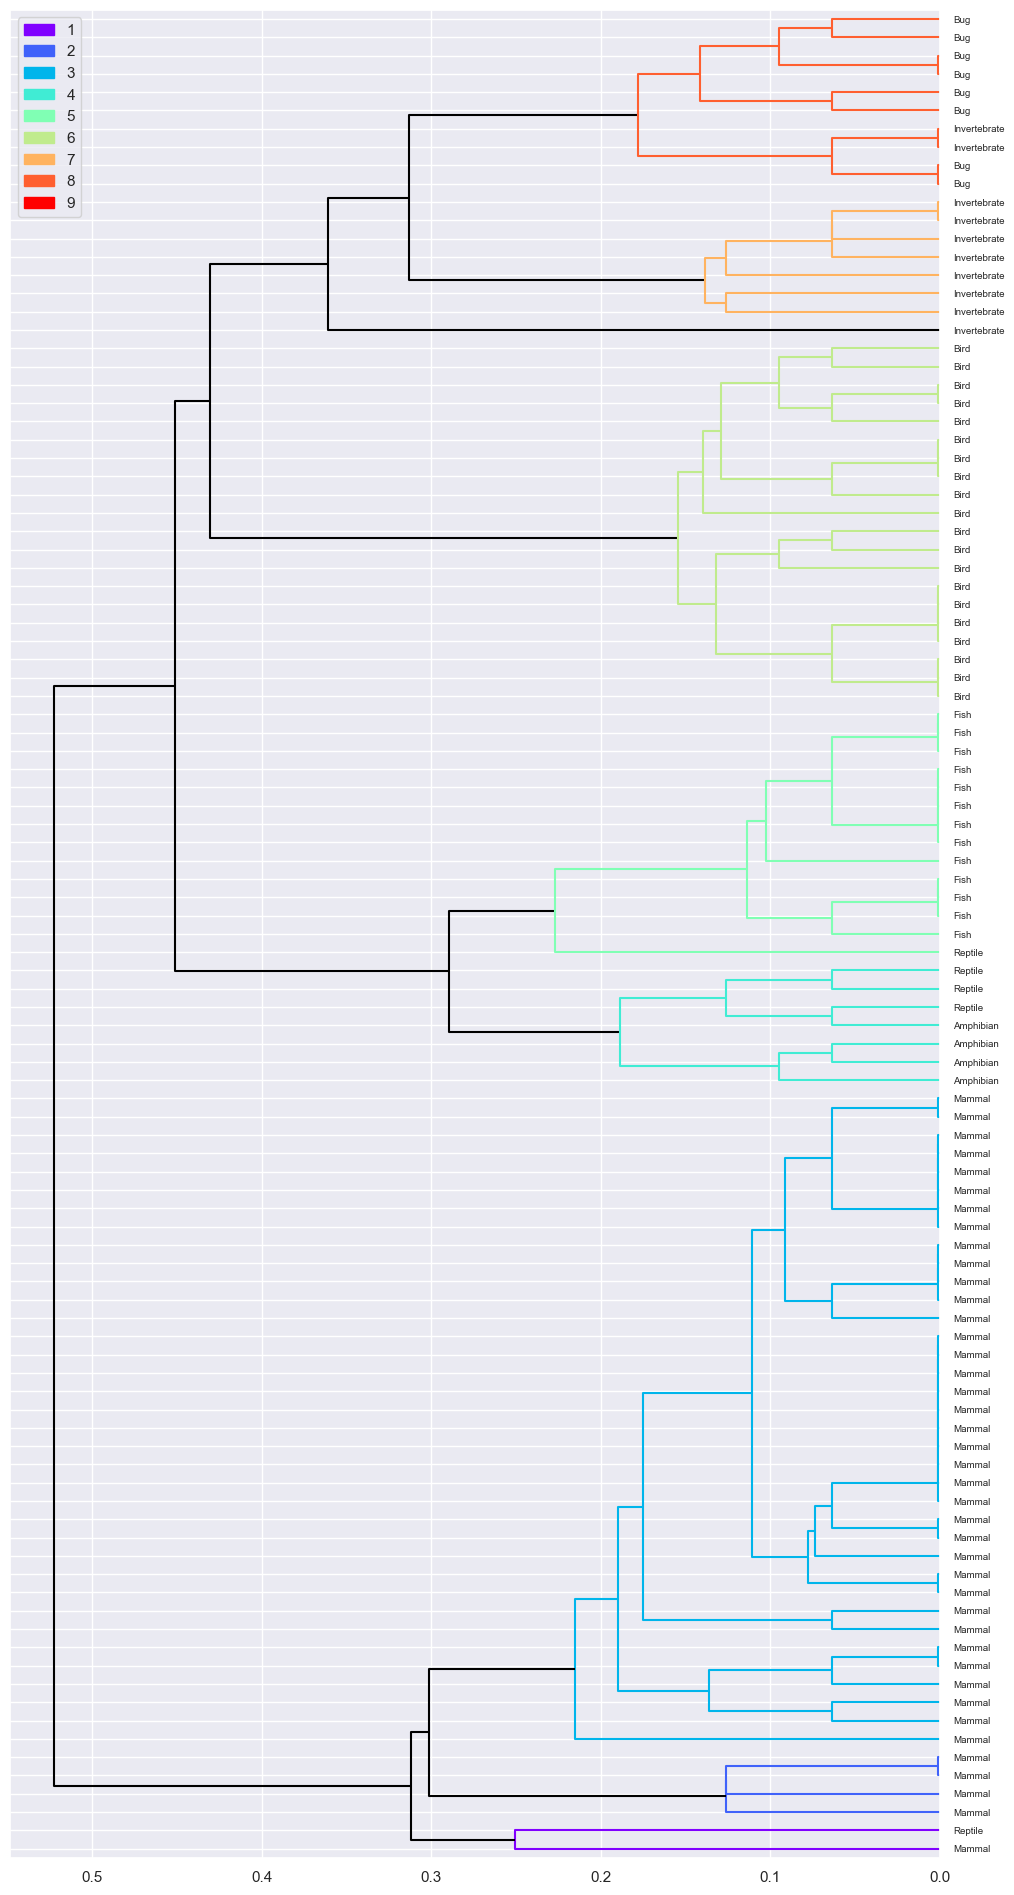

In [27]:
_ = plot_cluster_dendrogram(
    linkage_matrix=linkage_matrix,
    dataset_df=zoo_df,
    clusters=clusters,
    leaf_font_size=7,
    labels=animal_class.to_numpy()
)

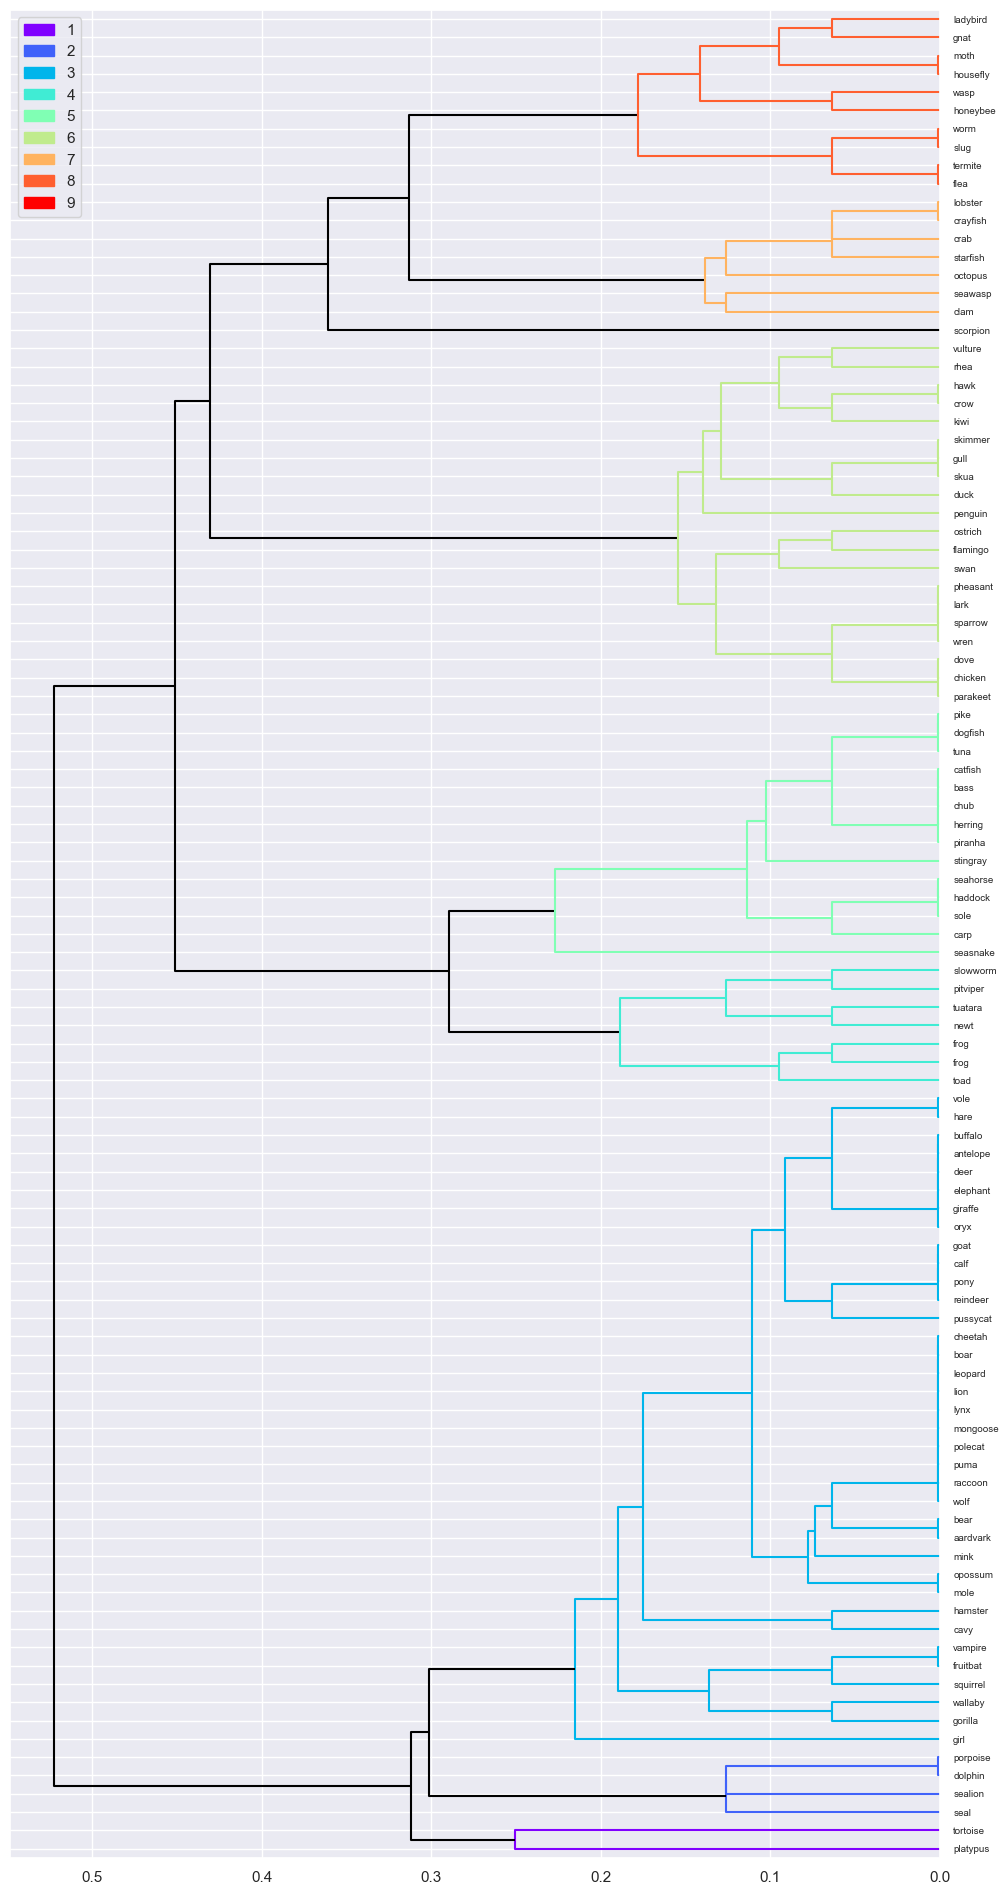

In [28]:
_ = plot_cluster_dendrogram(
    linkage_matrix=linkage_matrix,
    dataset_df=zoo_df,
    clusters=clusters,
    leaf_font_size=7
)